# imports and initializations

In [1]:
# add our custom modules to the python import path
import sys
import os
sys.path.append(os.getcwd() + '/../../Client_modules/')

import mResSweep
from socProxy import makeProxy
import h5py
from PythonDrivers.control_atten import setatten
# import PythonDrivers.YOKOGS200 as YOKOGS200
%matplotlib inline
import matplotlib.pyplot as plt
savePath = r'Z:\t1Team\Data\20221011TAHP02Annealed20min\RFSOC'

# Python 3.7
# os.environ['PATH'] = os.getcwd() + '\\PythonDrivers' + os.pathsep + os.environ['PATH']
# Python 3.8 and newer
os.add_dll_directory(os.getcwd() + '/../../Client_modules/PythonDrivers')

Could not import QickSoc: No module named 'pynq'


<AddedDllDirectory('C:\\Users\\my\\Documents\\GitHub\\ZCU216_Russell\\res_dev\\notebooks\\20221011_TAHP02annealed20min0926/../../Client_modules/PythonDrivers')>

In [2]:
# create proxy to ZCU216 board
soc, soccfg = makeProxy('192.168.1.121')
print(soccfg)

Pyro.NameServer PYRO:Pyro.NameServer@192.168.1.121:8888
myqick PYRO:obj_500e5ca0b7c2444c8bb806c4c4f679df@192.168.1.121:38727

QICK configuration:

	Board: ZCU216

	Global clocks (MHz): tProcessor 349.997, RF reference 245.760

	7 signal generator channels:
	0:	axis_sg_int4_v1 - tProc output 0, switch ch 0, maxlen 4096
		DAC tile 2, ch 0, 16-bit DDS, fabric=430.080 MHz, fs=1720.320 MHz
	1:	axis_sg_int4_v1 - tProc output 1, switch ch 1, maxlen 4096
		DAC tile 2, ch 1, 16-bit DDS, fabric=430.080 MHz, fs=1720.320 MHz
	2:	axis_sg_int4_v1 - tProc output 2, switch ch 2, maxlen 4096
		DAC tile 2, ch 2, 16-bit DDS, fabric=430.080 MHz, fs=1720.320 MHz
	3:	axis_sg_int4_v1 - tProc output 3, switch ch 3, maxlen 4096
		DAC tile 2, ch 3, 16-bit DDS, fabric=430.080 MHz, fs=1720.320 MHz
	4:	axis_signal_gen_v6 - tProc output 4, switch ch 4, maxlen 65536
		DAC tile 3, ch 0, 32-bit DDS, fabric=599.040 MHz, fs=9584.640 MHz
	5:	axis_signal_gen_v6 - tProc output 5, switch ch 5, maxlen 65536
		DAC tile 3, ch 

# Define sweep parameters

In [3]:
inputDict = {}
inputDict['LO_f'] = 5e3  # local oscillator frequency

# define frequencies
inputDict['span_f'] = 0.03  # frequency span to sweep over. The same for all resonators
inputDict['mixerCenter_f'] = 2200  # center frequency for the mixer
inputDict['res_f'] = [6.54095e3,  7.396327e3, 7.71271325e3, 8.008404e3]

# define numbers of points
inputDict['n_expts'] = 300  # number of points along the frequency axis

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 1000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -10 # dBm
inputDict['gain'] = [0.67, 0.85, 0.9, 1]
inputDict['attenSerial'] = [27712, 27784]

inputDict['attenList'] = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
inputDict['readout_lengthList'] = [1000, 1000, 1000, 1000,1000, 1000, 1000, 1000, 1000, 1000, 1000]  # time to average over
inputDict['n_roundsList'] = [1, 2, 2, 2, 2, 2, 4, 8, 10, 10, 10]  # number of times to sweep along the frequency axis
inputDict['n_repsList'] = [15, 30, 30, 150, 300, 600, 3000, 6000, 9000, 9000, 12000] # number of repetitions to take at each frequency point

# Acquire

Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 0.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 0.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 16.693 s
Final time = 16.693 s


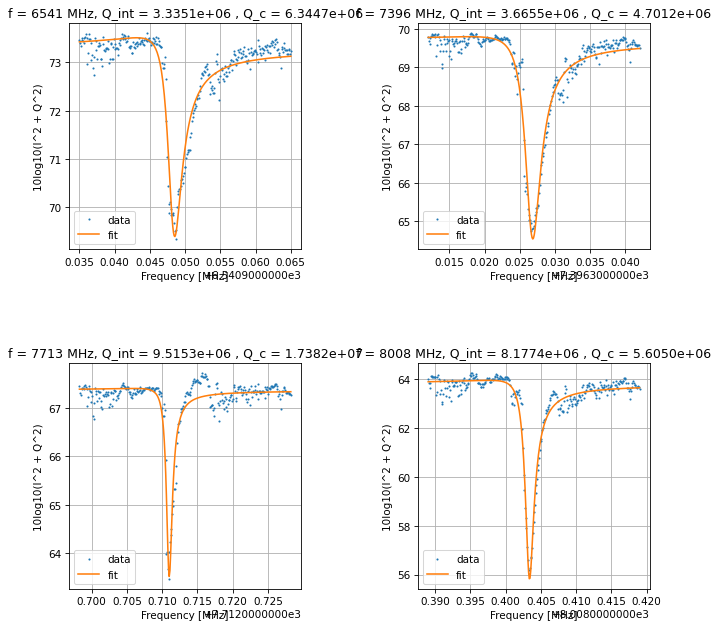

Saving data_p-10_012
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 5.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 5.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 21.330 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 21.401 s
Final time = 42.731 s


<Figure size 432x288 with 0 Axes>

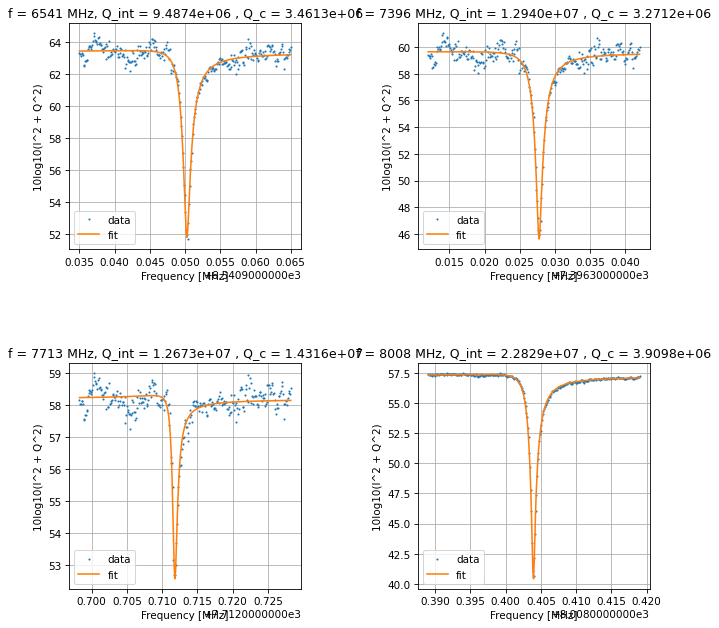

Saving data_p-20_013
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 10.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 10.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 21.330 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 21.324 s
Final time = 42.655 s


<Figure size 432x288 with 0 Axes>

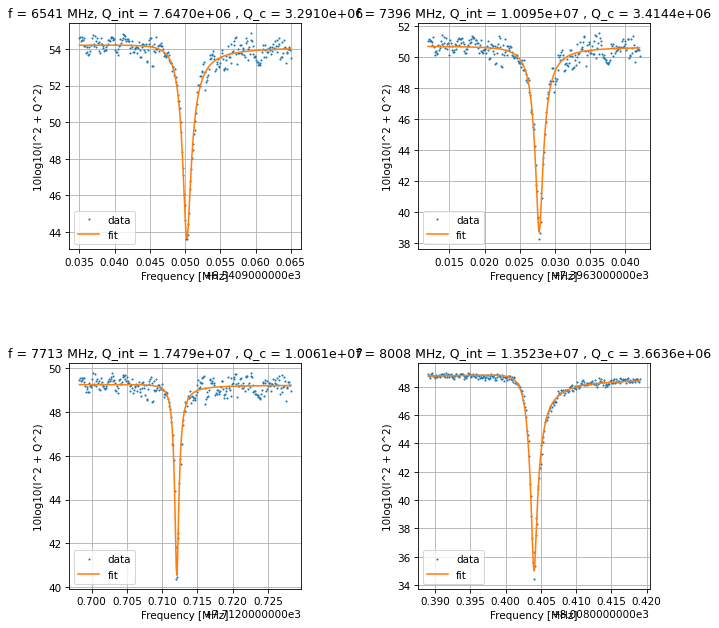

Saving data_p-30_014
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 15.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 15.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 57.259 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 56.991 s
Final time = 114.251 s


<Figure size 432x288 with 0 Axes>

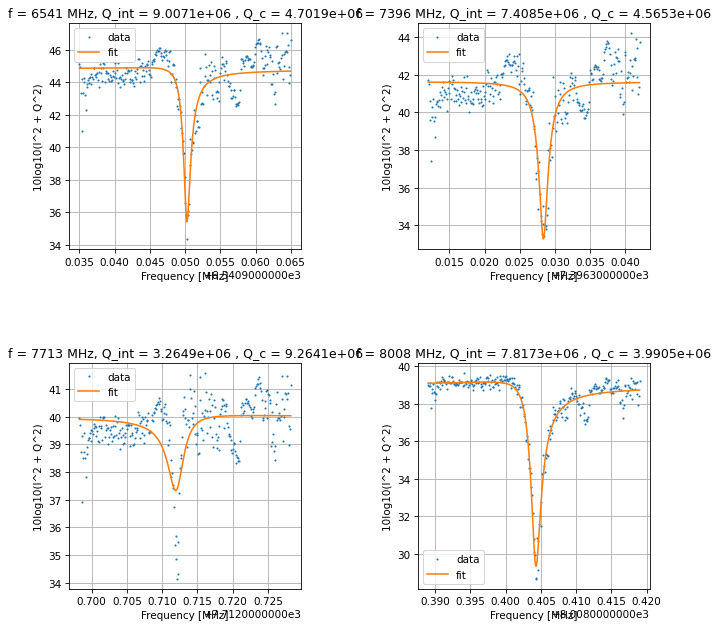

Saving data_p-40_015
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 20.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 20.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 102.161 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 101.924 s
Final time = 204.085 s


<Figure size 432x288 with 0 Axes>

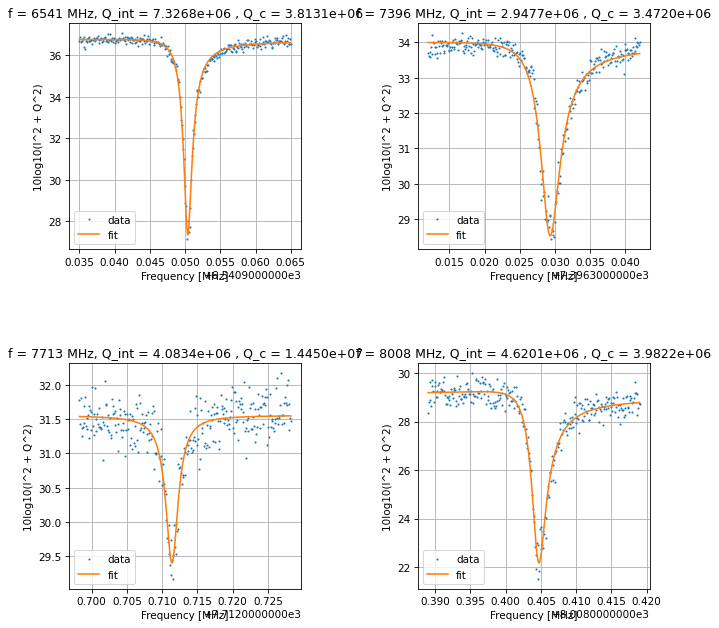

Saving data_p-50_016
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 25.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 25.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 193.198 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 192.266 s
Final time = 385.465 s


<Figure size 432x288 with 0 Axes>

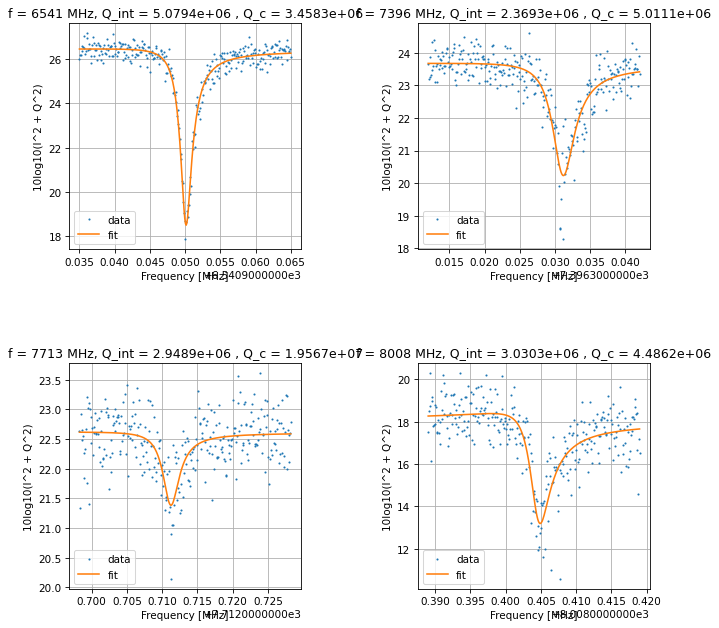

Saving data_p-60_017
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 30.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 30.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 912.208 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 912.042 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 2, time 912.017 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 3, time 912.027 s
Final time = 3648.293 s


<Figure size 432x288 with 0 Axes>

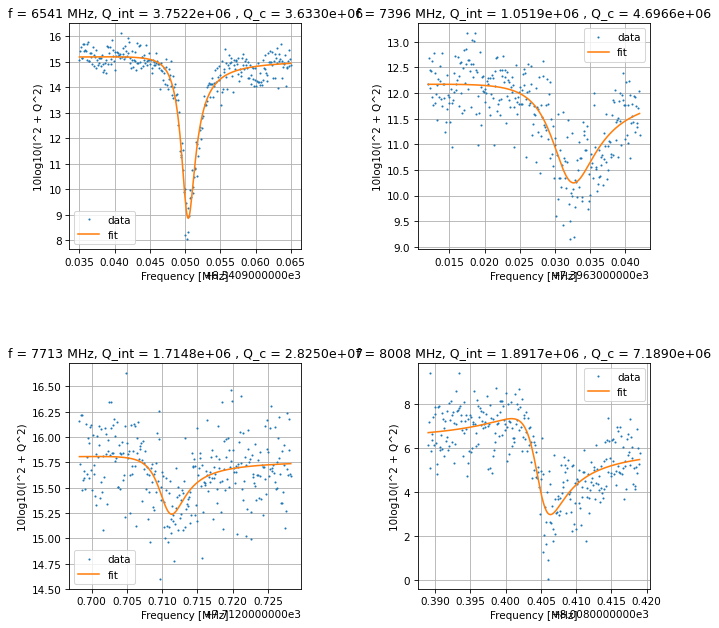

Saving data_p-70_018
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 35.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 35.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 1812.468 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 1812.236 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 2, time 1812.349 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 3, time 1812.406 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 4, time 1812.303 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 5, time 1812.371 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 6, time 1812.372 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 7, time 1812.396 s
Final time = 14498.902 s


<Figure size 432x288 with 0 Axes>

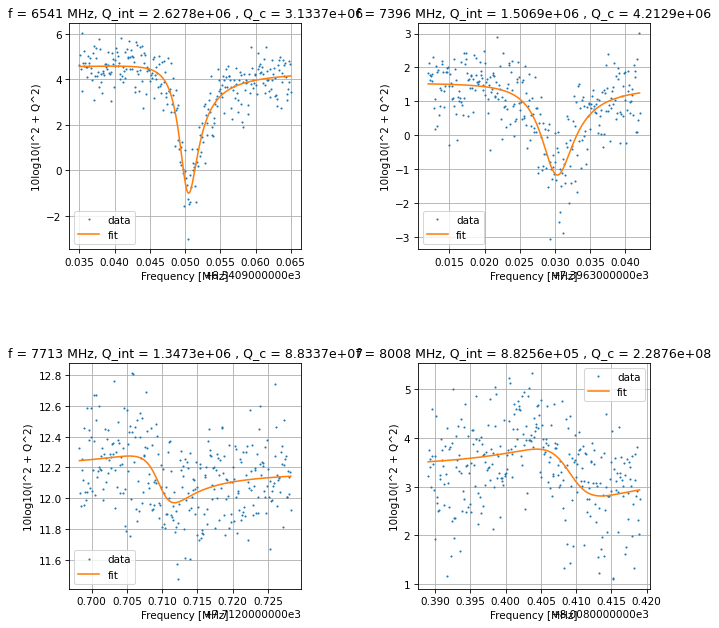

Saving data_p-80_019
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 40.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 40.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 2712.419 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 2712.725 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 2, time 2712.465 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 3, time 2712.452 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 4, time 2712.241 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 5, time 2712.444 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 6, time 2712.412 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 7, time 2712.370 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 8, time 2712.369 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 9, time 2712.561 s
Final time = 27124.459 s


<Figure size 432x288 with 0 Axes>

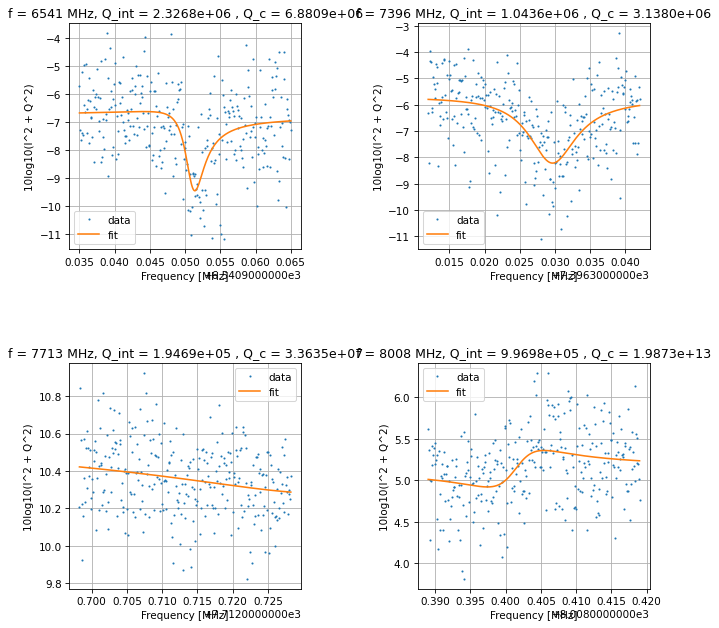

Saving data_p-90_020
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 45.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 45.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Pulse frequencies are: [-659.04999933  196.32700081  512.71325083  808.40399981] MHz
Frequencies out are: [1540.9499999999998, 2396.327, 2712.71325, 3008.4040000000005] MHz


  0%|          | 0/300 [00:00<?, ?it/s]

Round 0, time 2712.422 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 1, time 2712.373 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 2, time 2712.268 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 3, time 2712.580 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 4, time 2712.251 s


  0%|          | 0/300 [00:00<?, ?it/s]

Round 5, time 2712.277 s


  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
# Acquire
for i, atten in enumerate(inputDict['attenList']):
    # update per power parameters
    inputDict['power'] = inputDict['basePower']-atten
    inputDict['n_rounds'] = inputDict['n_roundsList'][i]
    inputDict['n_reps'] = inputDict['n_repsList'][i]
    inputDict['readout_length'] = inputDict['readout_lengthList'][i]

    # set attenuation. Split it evenly across all attenuators
    # NOTE: What happens if we average to somewhere between the resolution of the attenuators? Possible issue
    for serial in inputDict['attenSerial']:
        setatten(atten/len(inputDict['attenSerial']), serial, printv=True)

    # run a frequency sweep
    Instance = mResSweep.ResSweep(path=savePath, prefix='data_p'+str(inputDict['power']), inputDict=inputDict, soc=soc, soccfg=soccfg, 
                                  temperatureLogPath='Z:\Alex\other\LogFiles')
    data = mResSweep.ResSweep.acquire(Instance)
    mResSweep.ResSweep.display(Instance, data)
    mResSweep.ResSweep.save_data(Instance, data)